# Noise Smoothing

In [1]:
import pandas as pd
import numpy as np


In [2]:
n=200
df = pd.DataFrame(np.random.randint(0,100,size=(n,1)), columns = list('T'))
print(df)

      T
0    79
1    60
2    12
3    87
4    93
5    81
6     8
7    71
8    99
9    13
10   69
11   44
12   49
13   73
14   74
15   44
16   91
17   57
18   45
19    1
20   13
21   85
22   87
23   89
24   50
25    3
26   44
27   75
28   22
29   76
..   ..
170  93
171  94
172  49
173   1
174  68
175  95
176  99
177  16
178  23
179  38
180  38
181  31
182  19
183  60
184  15
185  10
186  28
187   7
188  92
189  60
190  73
191  96
192  76
193   6
194  91
195  18
196  13
197  51
198  12
199  90

[200 rows x 1 columns]


## Equal Width Binning

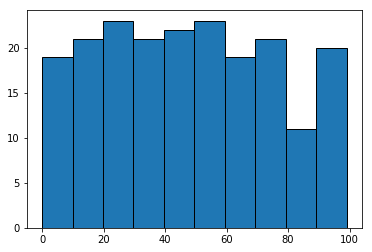

Bins
[ 0.   9.9 19.8 29.7 39.6 49.5 59.4 69.3 79.2 89.1 99. ]


In [5]:
import matplotlib.pyplot as plt
hist = plt.hist(df['T'], ec="black")
plt.show()
print("Bins")
print(hist[1])

In [6]:
df2 = df.copy()
df3 = df.copy()

In [7]:
#pd.cut(np.array(df2['T']),10)

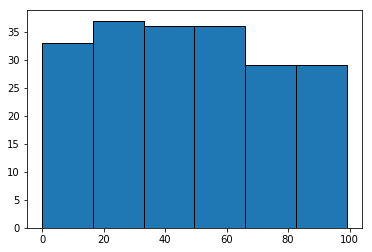

Bins
[ 0.  16.5 33.  49.5 66.  82.5 99. ]


In [8]:
#Scott
hist = plt.hist(np.array(df['T']),bins="scott",ec="black")
plt.show()
print("Bins")
print(hist[1])

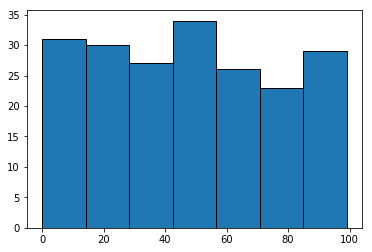

Bins
[ 0.         14.14285714 28.28571429 42.42857143 56.57142857 70.71428571
 84.85714286 99.        ]


In [9]:
#Freedman Diaconis Estimator
hist = plt.hist(np.array(df['T']),bins="fd",ec="black")
plt.show()
print("Bins")
print(hist[1])

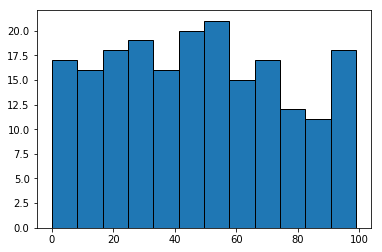

Bins
[ 0.    8.25 16.5  24.75 33.   41.25 49.5  57.75 66.   74.25 82.5  90.75
 99.  ]


In [10]:
#Rice
hist = plt.hist(np.array(df['T']),bins="rice",ec="black")
plt.show()
print("Bins")
print(hist[1])

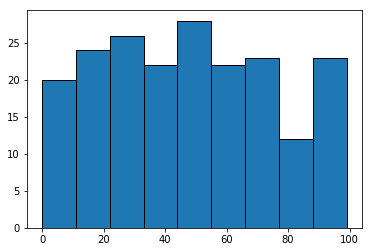

Bins
[ 0. 11. 22. 33. 44. 55. 66. 77. 88. 99.]


In [11]:
#Sturges
hist = plt.hist(np.array(df['T']),bins="sturges",ec="black")
plt.show()
print("Bins")
print(hist[1])

In [12]:
import math
import statistics

def sturge(n):
    k = 1 + 3.222 * math.log10(n)
    return k

def scott(a, n):
    stddev = statistics.stdev(a)
    k = 3.49 * stddev * (n**(-1/3))
    return k

def rice(n):
    k = 2 * n**(1/3)
    return k 

def freedman(a, n):
    iqr = a.quantile()
    k = (2 * iqr)/(n**(1/3))
    return k

In [13]:
sturge(n)

8.413918646029348

In [14]:
scott(df['T'],n)

16.674949774357373

In [15]:
rice(n)

11.696070952851462

In [16]:
freedman(df['T'],n)

16.073773898760955

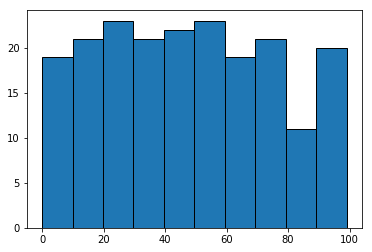

Bins
[ 0.   9.9 19.8 29.7 39.6 49.5 59.4 69.3 79.2 89.1 99. ]


In [17]:
hist = plt.hist(df['T'], ec="black", density=False)
plt.show()
print("Bins")
print(hist[1])

## Equal Depth Binning

### Each bin having a depth 20(10% of observations)

In [18]:
mylist = np.array(df['T'])
mylist
mylist.sort()
mylist

array([ 0,  1,  1,  2,  2,  3,  4,  5,  5,  6,  6,  6,  6,  7,  7,  8,  8,
        9,  9, 10, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 15, 16, 18,
       18, 18, 19, 19, 19, 19, 20, 20, 20, 21, 22, 22, 22, 23, 23, 24, 24,
       26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 29, 29, 30, 30, 30, 31, 31,
       31, 32, 33, 36, 36, 36, 36, 37, 37, 37, 38, 38, 38, 38, 39, 39, 40,
       41, 42, 42, 43, 43, 43, 43, 44, 44, 44, 45, 46, 46, 46, 47, 47, 48,
       49, 49, 49, 49, 50, 50, 51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54,
       54, 56, 56, 57, 57, 57, 57, 57, 58, 59, 60, 60, 60, 61, 61, 62, 63,
       64, 65, 65, 65, 65, 65, 66, 66, 66, 66, 68, 69, 71, 71, 71, 72, 72,
       73, 73, 73, 73, 73, 74, 75, 75, 75, 76, 76, 76, 77, 77, 78, 79, 80,
       81, 85, 86, 87, 87, 87, 87, 88, 89, 89, 90, 90, 91, 91, 92, 93, 93,
       93, 93, 94, 94, 95, 95, 96, 96, 96, 97, 98, 99, 99])

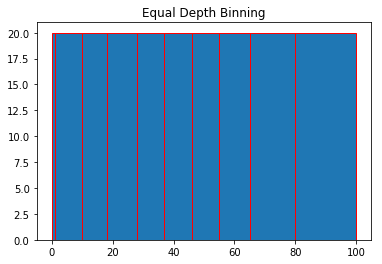

10
10
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[10, 11, 20, 28, 38, 47, 56, 65, 75, 90]


In [24]:
x=[]
y=[]
for i in range(0,200,20):
    x.append(20)
    k = mylist[i]
    for j in range(20):
        if(k<mylist[j]):
            k = mylist[j]
    y.append(k) 
    i=i+20

plt.bar(y,x,edgecolor='r',width=20)
plt.title("Equal Depth Binning")
plt.show()
print(len(x))
print(len(y))
print(x)
print(y)